In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision 
from torchvision.datasets import MNIST 
import torchvision.transforms as transforms

%matplotlib inline

torchvision.datasets es para importar diferentes tipos de data ejemplo

In [26]:
dataset = MNIST('data/', download=True)

In [27]:
len(dataset)
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

Ojo, con len() puedo ver el tamaño del dataset, pero no es un tipo de dato común
Es un tipo de dato especial del torchvision

In [28]:
test_dataset = MNIST('data/', train=False, download=True)

Si se escoge el train=False en el dataset del torchvision, entonces toma un conjunto
de los datos destinados para el test.

In [29]:
len(test_dataset)

10000

Ahora, quiero mirar como se ven los datos

In [30]:
print(dataset[0][0],dataset[0][1])

<PIL.Image.Image image mode=L size=28x28 at 0x7FCF9D3B13D0> 5


Podemos ver que los elemenos del dataset son un tuble, con el primer elemento que
es una imagen y el segundo el label

label:  5


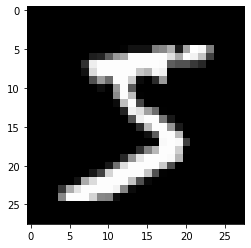

In [31]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('label: ', label)

Entonces como el tipo de imagen es PIL, se usa imshow para graficar los datos,
además, se puede ver que la imagen es de tamaño 28x28.

Ojo, al parecer no puedo graficar con una iteración, porque debo pasar el dataset
por un TensorData
    

OJO, no olvidar que estos datos no son aún tensores, sin simplemente imágenes, se deben
convertir a tensores, para eso al momento de importar debo escoger una opción llamada 
**transform** y debe ser igual a **transforms.ToTensor()**

**OJO** Es necesario importar el transforms de el torchvision.

Viendo la documentación de transform, hay muchas opciones para operar sobre imágenes, se puede
también importar como tensor pero hacer operaciones antes como normalización, transformación lineal, borrado random.

También se puede usar transform para el proceso inverso, convertir de tensor a imagen (debo
revisarlo luego).


Ahora, nuevamente el dataset está dividido en la imagen y el laben (dato entrada y salida) 
pero esta ves no se puede graficar al ser un tensor.

In [32]:
dataset = MNIST('data/', download=True, transform=transforms.ToTensor())

image_tensor, label = dataset[0]
# print(image,label)
print(type(image_tensor), type(label))
print(image_tensor.shape)

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28])


Al parecer aunque ahora sea un tensor, lo puedo graficar, pensaba que no.

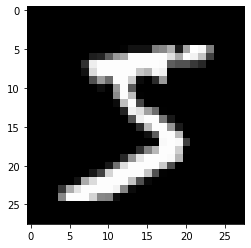

In [37]:
plt.imshow(image_tensor[0], cmap='gray')

Ahora voy a dividir los datos en uno de validación

In [40]:
def split_indices(n, val_pct):
    n_val = int(n*val_pct)
    indxs = np.random.permutation(n)
    #ojo, no me servía el randint porque podría repetir los índices
    return indxs[n_val:], indxs[:n_val]
    

In [41]:
train_indices, val_indices = split_indices(len(dataset),val_pct = 0.2)

In [44]:
print(train_indices.shape, val_indices.shape)

(48000,) (12000,)


In [46]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [53]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)


OJO, el sampler es una forma de organizar los items dentro del dataloader, hay varias opciones, sería bueno revisarlas en algún momento a detalle. Por ahora, el subsetrandomsampler toma una lista, o array de indices y genera un sampler de esos índices de manera aleatorioa.

Ahora, el dataloader es para organizar los datos de manera iterable en datos de entrada y salida, con batches también.

In [55]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

Definí simplemente un modelo lineal, el problema es que para la clasificación de los número vamos a usar onehot representation, por lo que toca hacer un softmax y un crossentropy para el error.

OJO, los parámetros definidos dentro del módulo nn son automáticamente requires_grad=True

In [58]:
print(model.weight, model.bias); print(model.weight.shape, model.bias.shape)

Parameter containing:
tensor([[ 0.0315, -0.0142,  0.0044,  ...,  0.0095,  0.0146, -0.0131],
        [ 0.0347,  0.0195, -0.0312,  ...,  0.0100, -0.0014, -0.0304],
        [ 0.0004, -0.0210,  0.0247,  ..., -0.0247, -0.0264,  0.0044],
        ...,
        [ 0.0224,  0.0077,  0.0204,  ...,  0.0034,  0.0219,  0.0077],
        [ 0.0220, -0.0245, -0.0297,  ...,  0.0345, -0.0158, -0.0055],
        [ 0.0274,  0.0217,  0.0026,  ..., -0.0042,  0.0088,  0.0148]],
       requires_grad=True) Parameter containing:
tensor([ 0.0226,  0.0241, -0.0077,  0.0250,  0.0058, -0.0245, -0.0101,  0.0215,
        -0.0137,  0.0043], requires_grad=True)
torch.Size([10, 784]) torch.Size([10])


In [60]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)

tensor([8, 1, 0, 1, 9, 3, 1, 0, 4, 1, 1, 2, 1, 7, 9, 8, 7, 1, 7, 1, 2, 5, 8, 0,
        1, 8, 6, 4, 9, 4, 6, 7, 3, 6, 2, 7, 8, 4, 4, 7, 9, 5, 1, 0, 4, 0, 3, 2,
        6, 1, 1, 5, 8, 2, 6, 4, 0, 7, 3, 2, 8, 4, 8, 5, 9, 3, 9, 2, 0, 7, 6, 0,
        4, 6, 6, 2, 4, 7, 1, 1, 4, 6, 2, 2, 5, 1, 4, 9, 8, 2, 1, 2, 8, 8, 5, 0,
        0, 8, 2, 9])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at /opt/conda/conda-bld/pytorch_1587428398394/work/aten/src/TH/generic/THTensorMath.cpp:41

**OJO** El error anterior se debe a que los datos de entrada no tienen la dimensión correcta, deben aplanarse a 28*28

Podemos entonces hacer la conversión de tamaño antes de, o la podemos definir dentro de nuestro modelo mismo, en el forward

In [62]:
class MNISTmodel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MNISTmodel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.view(-1,784)
        out = self.linear(xb)
        return out
model = MNISTmodel(input_size, num_classes)

In [66]:
for images, label in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs.shape)
    break
    

tensor([8, 1, 0, 1, 9, 3, 1, 0, 4, 1, 1, 2, 1, 7, 9, 8, 7, 1, 7, 1, 2, 5, 8, 0,
        1, 8, 6, 4, 9, 4, 6, 7, 3, 6, 2, 7, 8, 4, 4, 7, 9, 5, 1, 0, 4, 0, 3, 2,
        6, 1, 1, 5, 8, 2, 6, 4, 0, 7, 3, 2, 8, 4, 8, 5, 9, 3, 9, 2, 0, 7, 6, 0,
        4, 6, 6, 2, 4, 7, 1, 1, 4, 6, 2, 2, 5, 1, 4, 9, 8, 2, 1, 2, 8, 8, 5, 0,
        0, 8, 2, 9])
torch.Size([100, 1, 28, 28])
torch.Size([100, 10])


In [74]:
print(model.linear.weight.shape, model.linear.bias.shape)
print(model.parameters())


torch.Size([10, 784]) torch.Size([10])
<generator object Module.parameters at 0x7fcf9cd04cd0>


In [76]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print(outputs.shape, outputs[:2,:])

torch.Size([100, 10]) tensor([[-0.2342,  0.2149, -0.2024,  0.2304,  0.2194, -0.2268, -0.1529, -0.1125,
          0.3382, -0.1060],
        [-0.3769,  0.3660,  0.0084,  0.4478,  0.3935, -0.1509, -0.2171,  0.1230,
          0.1677, -0.0896]], grad_fn=<SliceBackward>)


In [77]:
import torch.nn.functional as F

In [82]:
prob_out = F.softmax(outputs, dim=1)

In [84]:
max_prob, pred = torch.max(prob_out, dim=1)

In [87]:
print(pred)
print(labels)

tensor([8, 3, 3, 4, 8, 4, 8, 3, 3, 3, 9, 1, 3, 3, 1, 8, 6, 3, 1, 8, 8, 8, 3, 8,
        8, 1, 8, 3, 3, 3, 3, 4, 8, 1, 1, 3, 4, 8, 8, 3, 3, 8, 3, 3, 4, 3, 3, 8,
        3, 8, 8, 1, 8, 3, 3, 3, 8, 3, 1, 8, 8, 8, 8, 1, 4, 8, 3, 3, 8, 1, 3, 8,
        8, 3, 8, 4, 3, 1, 4, 1, 3, 8, 8, 4, 3, 3, 3, 8, 3, 3, 4, 3, 3, 7, 1, 4,
        8, 3, 3, 4])
tensor([9, 4, 5, 2, 4, 7, 7, 8, 1, 4, 6, 4, 1, 6, 9, 1, 6, 2, 7, 7, 3, 1, 3, 9,
        0, 7, 1, 0, 6, 4, 0, 4, 3, 5, 9, 6, 8, 8, 1, 3, 9, 1, 7, 2, 2, 1, 1, 8,
        6, 9, 5, 9, 8, 8, 3, 6, 2, 6, 5, 9, 8, 4, 3, 5, 2, 9, 1, 6, 9, 7, 6, 9,
        7, 6, 5, 1, 3, 9, 3, 8, 0, 1, 5, 8, 1, 0, 1, 8, 2, 8, 6, 3, 3, 3, 1, 9,
        3, 2, 2, 1])


In [97]:
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(pred)

In [98]:
accuracy(pred, labels)

0.14

La función accuracy es buena para medir el modelo, pero no para optimizarlo, ya que no es diferenciable. Para eso podemos usar cross entroy, el cual usa la siguiente ecuación:

$$ D(\hat{y},y) = -\sum_j{y_j ln \hat{y_j}} $$

Donde $\hat{y}$ es la probabilidad predicha y $ y $ es la probabilidad real del label.
El signo negativo es debido a que la probabilidad predicha va de 0 a 1, por lo que el ln es negativo.

Hay una función en pytorch que primero hace el softmax y luego el cross entropy.

In [99]:
loss_fn = F.cross_entropy

In [102]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.2973, grad_fn=<NllLossBackward>)


Ahora debo definir el optimizador

In [103]:
lr = 0.001
opt = torch.optim.SGD(model.parameters(),lr=lr)

In [222]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    pred = model(xb)
    loss = loss_func(pred, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        metric_result = metric(pred,yb)
    
    return loss.item(), len(xb), metric_result

**OJO** el optimizador y la métrica son opcionales en esta función, para asegurarme que la función la podré utilizar para calcular el loss para los datos de validación y testeo.

In [174]:
def evaluate(model, loss_func, valid_dl, metric=None):
    with torch.no_grad():

        results = [loss_batch(model, loss_func, xb, yb, metric=metric) for xb, yb in valid_dl]

        losses, nums, metrics = zip(*results)

        total = np.sum(nums)

        avg_loss = np.sum(np.multiply(losses,nums))/total

        avg_metric = None

        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics,nums))/total

    return avg_loss, total, avg_metric

In [186]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [176]:
val_loss, total, val_acc = evaluate(model,loss_fn,val_loader, accuracy)

In [177]:
print(val_loss, total, val_acc)

2.3043393035729727 12000 0.12466666666666666


In [231]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        result = evaluate(model,loss_fn, valid_dl,metric=metric)
        val_loss, total, val_metric = result

        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))

        else:
            print('Epoch [{}/{}], Loss: {}, {}: {:.4f}'.format(epoch+1,epochs, loss,metric.__name__, val_metric))

In [183]:
model = MNISTmodel(input_size, num_classes )

In [184]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [232]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.43021854758262634, accuracy: 0.8719
Epoch [2/5], Loss: 0.5321688652038574, accuracy: 0.8723
Epoch [3/5], Loss: 0.5593116283416748, accuracy: 0.8731
Epoch [4/5], Loss: 0.5725670456886292, accuracy: 0.8736
Epoch [5/5], Loss: 0.5799338817596436, accuracy: 0.8745


In [233]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.48510056734085083, accuracy: 0.8749
Epoch [2/5], Loss: 0.49651899933815, accuracy: 0.8753
Epoch [3/5], Loss: 0.5016648769378662, accuracy: 0.8758
Epoch [4/5], Loss: 0.3379616141319275, accuracy: 0.8762
Epoch [5/5], Loss: 0.4077931344509125, accuracy: 0.8771


In [234]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.3813748061656952, accuracy: 0.8776
Epoch [2/5], Loss: 0.412529855966568, accuracy: 0.8782
Epoch [3/5], Loss: 0.4845489263534546, accuracy: 0.8789
Epoch [4/5], Loss: 0.40327563881874084, accuracy: 0.8794
Epoch [5/5], Loss: 0.4235337972640991, accuracy: 0.8800


In [235]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.4611455798149109, accuracy: 0.8808
Epoch [2/5], Loss: 0.4005926549434662, accuracy: 0.8813
Epoch [3/5], Loss: 0.5786811113357544, accuracy: 0.8815
Epoch [4/5], Loss: 0.5154942870140076, accuracy: 0.8820
Epoch [5/5], Loss: 0.45869046449661255, accuracy: 0.8826


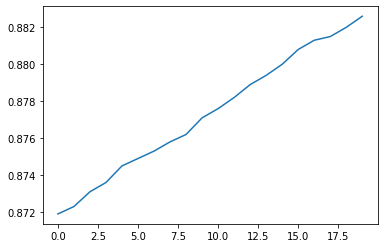

In [237]:
accuracies = [0.8719,0.8723,0.8731,0.8736,0.8745,0.8749,0.8753,0.8758,0.8762,0.8771,
             0.8776,0.8782,0.8789,0.8794,0.8800,0.8808,0.8813,0.8815,0.8820,0.8826]

plt.plot(accuracies)

# Pruebas varias

In [129]:
results = [loss_batch(model, loss_fn, xb, yb, metric=accuracy) for xb, yb in val_loader]

In [133]:
a,b,c = zip(*results)

In [141]:
print(a[0],b[0], c[0])
print(results)

2.342181921005249 100 0.13
[(2.342181921005249, 100, 0.13), (2.318309783935547, 100, 0.21), (2.3299460411071777, 100, 0.1), (2.350898504257202, 100, 0.09), (2.3308675289154053, 100, 0.09), (2.338451385498047, 100, 0.13), (2.295437812805176, 100, 0.18), (2.3414549827575684, 100, 0.1), (2.3385541439056396, 100, 0.12), (2.3302321434020996, 100, 0.12), (2.340193510055542, 100, 0.13), (2.3320140838623047, 100, 0.17), (2.321310043334961, 100, 0.1), (2.3518314361572266, 100, 0.1), (2.3188295364379883, 100, 0.08), (2.3416831493377686, 100, 0.16), (2.2768173217773438, 100, 0.17), (2.328573703765869, 100, 0.14), (2.3249237537384033, 100, 0.15), (2.356862783432007, 100, 0.08), (2.3471524715423584, 100, 0.1), (2.3517768383026123, 100, 0.08), (2.3567960262298584, 100, 0.09), (2.298767328262329, 100, 0.15), (2.293274164199829, 100, 0.14), (2.3206210136413574, 100, 0.14), (2.3376495838165283, 100, 0.05), (2.3733458518981934, 100, 0.06), (2.3303637504577637, 100, 0.12), (2.3201565742492676, 100, 0.16)

In [147]:
# print(*results)
lista_prueba = [(1,2,4),(5,6,7),(8,9,10)]
print(lista_prueba, *lista_prueba)

[(1, 2, 4), (5, 6, 7), (8, 9, 10)] (1, 2, 4) (5, 6, 7) (8, 9, 10)


In [154]:
a_ver = zip(*lista_prueba)

In [155]:
x,y,z = a_ver